# Cleaning and Preprocessing - 2021 Data

**Author**: Stephanie Golob

**contact**: estefaniagolob@gmail.com

**Date**: July 4, 2022

**Previous Notebook**: 1 of 7 (Cleaning and Preprocessing - 2020 Data)

**Current Notebook**: 2 of 7

**Next Notebook**: 3 of 7 (Exploratory Data Analysis)

---

## Introduction



The data was downloaded from [The Bureau of Transportation Statistics](https://transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr). It consists of domestic flight data from the USA for all months of 2021. The data was downloaded by month and then concatenated to create a full 2021 data set.

After initial exploratory data analysis I decided to focus on a subset of data to reduce noise from including too many airports and flights. I have chosen to focus on Hartsfield-Jackson Atlanta International Airport as it is the most popular origin airport in this data set (and the 2020 data set as well).

In this notebook I perform some limited exploratory data analysis to remove columns with high percentages of missing values, check for duplicated values, and create a subset of data with ATL selected as the origin airport. I have also added weather data for Hartsfield-Jackson Atlanta International Airport downloaded from [NOAA](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00013874/detail).

### Data Dictionary

| Feature                         | Data type | Description                                                                                                                                                                                                                           |
|---------------------------------|-----------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Year                            | numeric   | The year of the flight                                                                                                                                                                                                                |
| Quarter                         | numeric   | The quarter of the flight                                                                                                                                                                                                             |
| Month                           | numeric   | The month of the flight                                                                                                                                                                                                               |
| DayofMonth                      | numeric   | The day of the month of the flight                                                                                                                                                                                                    |
| DayOfWeek                       | numeric   | The day of the week of the flight                                                                                                                                                                                                     |
| Flightdate                      | object    | The date of the flight (yyyymmdd)                                                                                                                                                                                                     |
| Reporting_Airline               | numeric   | Unique carrier code for each airline                                                                                                                                                                                                  |
| DOT_ID_Reporting_Airline        | numeric   | An identification number assigned by US Department of Transportation (DOT) to identify a unique airline (carrier)                                                                                                                     |
| IATA_CODE_Reporting_Airline     | numeric   | ode assigned by the International Air Transport Association (IATA) and commonly used to identify a carrier                                                                                                                            |
| Tail_Number                     | numeric   | Flight tail number used to identify a unique airplane                                                                                                                                                                                 |
| Flight_Number_Reporting_Airline | numeric   | Number used to identify the flight                                                                                                                                                                                                    |
| OriginAirportID                 | numeric   | An identification number assigned by US DOT to identify a unique airport                                                                                                                                                              |
| OriginAirportSeqID              | numeric   | An identification number assigned by US DOT to identify a unique airport at a given point of time                                                                                                                                     |
| OriginCityMarketID              | numeric   | City Market ID is an identification number assigned by US DOT to identify a city market                                                                                                                                               |
| Origin                          | object    | 3-letter string used to identify each origin airport                                                                                                                                                                                  |
| OriginCityName                  | object    | String with the city and state name of the origin airport                                                                                                                                                                             |
| OriginState                     | object    | 2-letter string used to identify each origin state                                                                                                                                                                                    |
| OriginStateFips                 | numeric   | 2-digit unique code to identify each origin state                                                                                                                                                                                     |
| OriginStateName                 | object    | String with the state name of the origin airport                                                                                                                                                                                      |
| OriginWac                       | numeric   | Origin airport unique world airport code                                                                                                                                                                                              |
| DestAirportID                   | numeric   | An identification number assigned by US DOT to identify a unique airport                                                                                                                                                              |
| DestAirportSeqID                | numeric   | An identification number assigned by US DOT to identify a unique airport at a given point of time                                                                                                                                     |
| DestCityMarketID                | numeric   | City Market ID is an identification number assigned by US DOT to identify a city market                                                                                                                                               |
| Dest                            | object    | 3-letter string used to identify each destination airport                                                                                                                                                                             |
| DestCityName                    | object    | String with the city and state name of the destination airport                                                                                                                                                                        |
| DestState                       | object    | 2-letter string used to identify each destination state                                                                                                                                                                               |
| DestStateFips                   | numeric   | 2-digit unique code to identify each destination state                                                                                                                                                                                |
| DestStateName                   | object    | String with the state name of the destination airport                                                                                                                                                                                 |
| DestWac                         | numeric   | Destination airport unique world airport code                                                                                                                                                                                         |
| CRSDepTime                      | numeric   | Scheduled departure time (local time hhmm)                                                                                                                                                                                            |
| DepTime                         | numeric   | Actual departure time                                                                                                                                                                                                                 |
| DepDelay                        | numeric   | Difference in minutes between scheduled and actual departure time. Early departures show negative numbers                                                                                                                             |
| DepDelayMinutes                 | numeric   | Difference in minutes between scheduled and actual departure time. Early departures set to 0.                                                                                                                                         |
| DepDel15                        | numeric   | Departure Delay Indicator, 15 Minutes or More (1=Yes)                                                                                                                                                                                 |
| DepartureDelayGroups            | numeric   | Departure Delay intervals, every (15 minutes from <-15 to >180)                                                                                                                                                                       |
| DepTimeBlk                      | numeric   | Scheduled departure time block, given in hourly intervals                                                                                                                                                                             |
| TaxiOut                         | numeric   | Taxi out time, in minutes                                                                                                                                                                                                             |
| WheelsOff                       | numeric   | The time when the plane has fully taken off from the terminal after taxi out (local time: hhmm)                                                                                                                                       |
| WheelsOn                        | numeric   | The time when the plane has landed at the destination airport (local time: hhmm)                                                                                                                                                      |
| TaxiIn                          | numeric   | Taxi in time, in minutes                                                                                                                                                                                                              |
| CRSArrTime                      | numeric   | Scheduled departure time (local time hhmm)                                                                                                                                                                                            |
| ArrTime                         | numeric   | Actual arrival time                                                                                                                                                                                                                   |
| ArrDelay                        | numeric   | Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers                                                                                                                                 |
| ArrDelayMinutes                 | numeric   | Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0                                                                                                                                              |
| ArrDel15                        | numeric   | Arrival delay indicator, 15 minutes or more (1=Yes)                                                                                                                                                                                   |
| ArrivalDelayGroups              | numeric   | Arrival delay intervals, every (15-minutes from <-15 to >180)                                                                                                                                                                         |
| ArrTimeBlk                      | numeric   | Arrival time block, hourly intervals                                                                                                                                                                                                  |
| Cancelled                       | numeric   | Cancelled Flight Indicator (1=Yes)                                                                                                                                                                                                    |
| CancellationCode                | object    | String specifying the reason for cancellation                                                                                                                                                                                         |
| Diverted                        | numeric   | Diverted Flight Indicator (1=Yes)                                                                                                                                                                                                     |
| CRSElapsedTime                  | numeric   | The scheduled elapsed time of the flight, in minutes                                                                                                                                                                                  |
| ActualElapsedTime               | numeric   | The actual elapsed time of the flight, in minutes                                                                                                                                                                                     |
| AirTime                         | numeric   | Flight time in minutes                                                                                                                                                                                                                |
| Flights                         | numeric   | The number of flights per row, all values equal 1                                                                                                                                                                                     |
| Distance                        | numeric   | Distance between airports (miles)                                                                                                                                                                                                     |
| DistanceGroup                   | numeric   | Distance Intervals, every 250 Miles, for Flight Segment                                                                                                                                                                               |
| CarrierDelay                    | numeric   | The cause of the delay was due to circumstances within the airline's control (maintenance and crew, fueling, baggage loading, cleaning the cabin, etc.), in minutes                                                                   |
| WeatherDelay                    | numeric   | Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane, in minutes                                    |
| NASDelay                        | numeric   | Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control, in minutes  |
| SecurityDelay                   | numeric   | Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas, in minutes |
| LateAircraftDelay               | numeric   | A previous flight with same aircraft arrived late, causing the present flight to depart late, in minutes                                                                                                                              |
| FirstDepTime                    | numeric   | First Gate Departure Time at Origin Airport                                                                                                                                                                                           |
| TotalAddGTime                   | numeric   | Total Ground Time Away from Gate for Gate Return or Cancelled Flight                                                                                                                                                                  |
| LongestAddGTime                 | numeric   | Longest Time Away from Gate for Gate Return or Cancelled Flight                                                                                                                                                                       |
| DivAirportLandings              | numeric   | Number of Diverted Airport Landings                                                                                                                                                                                                   |
| DivReachedDest                  | numeric   | Diverted Flight Reaching Scheduled Destination Indicator (1=Yes)                                                                                                                                                                      |
| DivActualElapsedTime            | numeric   | Elapsed Time of Diverted Flight Reaching Scheduled Destination, in Minutes. The ActualElapsedTime column remains NULL for all diverted flights                                                                                        |
| DivArrDelay                     | numeric   | Difference in minutes between scheduled and actual arrival time for a diverted flight reaching scheduled destination. The ArrDelay column remains NULL for all diverted flights                                                       |
| DivDistance                     | numeric   | Distance between scheduled destination and final diverted airport (miles). Value will be 0 for diverted flight reaching scheduled destination                                                                                         |
| Div1Airport                     | numeric   | Diverted Airport Code1                                                                                                                                                                                                                |
| Div1AirportID                   | numeric   | Airport ID of Diverted Airport 1                                                                                                                                                                                                      |
| Div1AirportSeqID                | numeric   | Airport Sequence ID of Diverted Airport 1                                                                                                                                                                                             |
| Div1WheelsOn                    | numeric   | Wheels On Time (local time: hhmm) at Diverted Airport Code1                                                                                                                                                                           |
| Div1TotalGTime                  | numeric   | Total Ground Time Away from Gate at Diverted Airport Code1                                                                                                                                                                            |
| Div1LongestGTime                | numeric   | Longest Ground Time Away from Gate at Diverted Airport Code1                                                                                                                                                                          |
| Div1WheelsOff                   | numeric   | Wheels Off Time (local time: hhmm) at Diverted Airport Code1                                                                                                                                                                          |
| Div1TailNum                     | numeric   | Aircraft Tail Number for Diverted Airport Code1                                                                                                                                                                                       |
| Div2Airport                     | numeric   | Diverted Airport Code2                                                                                                                                                                                                                |
| Div2AirportID                   | numeric   | Airport ID of Diverted Airport 2                                                                                                                                                                                                      |
| Div2AirportSeqID                | numeric   | Airport Sequence ID of Diverted Airport 2. Unique Key for Time Specific Information for an Airport                                                                                                                                    |
| Div2WheelsOn                    | numeric   | Wheels On Time (local time: hhmm) at Diverted Airport Code2                                                                                                                                                                           |
| Div2TotalGTime                  | numeric   | Total Ground Time Away from Gate at Diverted Airport Code2                                                                                                                                                                            |
| Div2LongestGTime                | numeric   | Longest Ground Time Away from Gate at Diverted Airport Code2                                                                                                                                                                          |
| Div2WheelsOff                   | numeric   | Wheels Off Time (local time: hhmm) at Diverted Airport Code2                                                                                                                                                                          |
| Div2TailNum                     | numeric   | Aircraft Tail Number for Diverted Airport Code2                                                                                                                                                                                       |
| Div3Airport                     | numeric   | Diverted Airport Code3                                                                                                                                                                                                                |
| Div3AirportID                   | numeric   | Airport ID of Diverted Airport 3                                                                                                                                                                                                      |
| Div3AirportSeqID                | numeric   | Airport Sequence ID of Diverted Airport 3                                                                                                                                                                                             |
| Div3WheelsOn                    | numeric   | Wheels On Time (local time: hhmm) at Diverted Airport Code3                                                                                                                                                                           |
| Div3TotalGTime                  | numeric   | Total Ground Time Away from Gate at Diverted Airport Code3                                                                                                                                                                            |
| Div3LongestGTime                | numeric   | Longest Ground Time Away from Gate at Diverted Airport Code3                                                                                                                                                                          |
| Div3WheelsOff                   | numeric   | Wheels Off Time (local time: hhmm) at Diverted Airport Code3                                                                                                                                                                          |
| Div3TailNum                     | numeric   | Aircraft Tail Number for Diverted Airport Code3                                                                                                                                                                                       |
| Div4Airport                     | numeric   | Diverted Airport Code4                                                                                                                                                                                                                |
| Div4AirportID                   | numeric   | Airport ID of Diverted Airport 4                                                                                                                                                                                                      |
| Div4AirportSeqID                | numeric   | Airport Sequence ID of Diverted Airport 4. Unique Key for Time Specific Information for an Airport                                                                                                                                    |
| Div4WheelsOn                    | numeric   | Wheels On Time (local time: hhmm) at Diverted Airport Code4                                                                                                                                                                           |
| Div4TotalGTime                  | numeric   | Total Ground Time Away from Gate at Diverted Airport Code4                                                                                                                                                                            |
| Div4LongestGTime                | numeric   | Longest Ground Time Away from Gate at Diverted Airport Code4                                                                                                                                                                          |
| Div4WheelsOff                   | numeric   | Wheels Off Time (local time: hhmm) at Diverted Airport Code4                                                                                                                                                                          |
| Div4TailNum                     | numeric   | Aircraft Tail Number for Diverted Airport Code4                                                                                                                                                                                       |
| Div5Airport                     | numeric   | Diverted Airport Code5                                                                                                                                                                                                                |
| Div5AirportID                   | numeric   | Airport ID of Diverted Airport 5                                                                                                                                                                                                      |
| Div5AirportSeqID                | numeric   | Airport Sequence ID of Diverted Airport 5. Unique Key for Time Specific Information for an Airport                                                                                                                                    |
| Div5WheelsOn                    | numeric   | Wheels On Time (local time: hhmm) at Diverted Airport Code5                                                                                                                                                                           |
| Div5TotalGTime                  | numeric   | Total Ground Time Away from Gate at Diverted Airport Code5                                                                                                                                                                            |
| Div5LongestGTime                | numeric   | Longest Ground Time Away from Gate at Diverted Airport Code5                                                                                                                                                                          |
| Div5WheelsOff                   | numeric   | Wheels Off Time (local time: hhmm) at Diverted Airport Code5                                                                                                                                                                          |
| Div5TailNum                     | numeric   | Aircraft Tail Number for Diverted Airport Code5                                                                                                                                             

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cleaning-and-Preprocessing---2021-Data" data-toc-modified-id="Cleaning-and-Preprocessing---2021-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cleaning and Preprocessing - 2021 Data</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Data Dictionary</a></span></li></ul></li><li><span><a href="#Cleaning-and-Preprocessing-2021-Data" data-toc-modified-id="Cleaning-and-Preprocessing-2021-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cleaning and Preprocessing 2021 Data</a></span></li><li><span><a href="#Data-Cleaning-on-ATL-2021-Data-Set" data-toc-modified-id="Data-Cleaning-on-ATL-2021-Data-Set-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Cleaning on ATL 2021 Data Set</a></span><ul class="toc-item"><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Data-Types" data-toc-modified-id="Data-Types-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Data Types</a></span></li><li><span><a href="#Weather-Data" data-toc-modified-id="Weather-Data-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Weather Data</a></span></li><li><span><a href="#Weather-Data-Dictionary" data-toc-modified-id="Weather-Data-Dictionary-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Weather Data Dictionary</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></li></ul></li></ul></div>

---

## Cleaning and Preprocessing 2021 Data

Load the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# use argument display.max_columns to display all columns, None sets it to an unlimited view
pd.set_option('display.max_columns', None)

Create a file path to read in all the dataframes for each month of 2021.

In [3]:
file_paths = ["data/2021/2021_jan.csv", "data/2021/2021_feb.csv",
              "data/2021/2021_mar.csv", "data/2021/2021_apr.csv", 
              "data/2021/2021_may.csv", "data/2021/2021_jun.csv", 
              "data/2021/2021_jul.csv", "data/2021/2021_aug.csv",
              "data/2021/2021_sep.csv", "data/2021/2021_oct.csv",
              "data/2021/2021_nov.csv", "data/2021/2021_dec.csv"]

Use a for loop to read all of the dataframes and concatenate them together into one final dataframe.

In [4]:
# create an empty Dataframe
df_2021 = pd.DataFrame()

for file in file_paths:
    
    #read in the csv files
    df = pd.read_csv(file)
    
    #concatenate the files
    df_2021 = pd.concat([df_2021, df])

In [5]:
# check the new dataframe
df_2021.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2021,1,1,2,6,2021-01-02,9E,20363,9E,N337PQ,4628,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,730,733.0,3.0,3.0,0.0,0.0,0700-0759,12.0,745.0,914.0,13.0,939,927.0,-12.0,0.0,0.0,-1.0,0900-0959,0.0,NaN,0.0,129.0,114.0,89.0,1.0,752.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,1,1,3,7,2021-01-03,9E,20363,9E,N607LR,4628,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,730,727.0,-3.0,0.0,0.0,-1.0,0700-0759,10.0,737.0,914.0,10.0,939,924.0,-15.0,0.0,0.0,-1.0,0900-0959,0.0,NaN,0.0,129.0,117.0,97.0,1.0,752.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,1,1,4,1,2021-01-04,9E,20363,9E,N602LR,4628,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,730,737.0,7.0,7.0,0.0,0.0,0700-0759,11.0,748.0,931.0,7.0,939,938.0,-1.0,0.0,0.0,-1.0,0900-0959,0.0,NaN,0.0,129.0,121.0,103.0,1.0,752.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,1,1,7,4,2021-01-07,9E,20363,9E,N295PQ,4628,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1715,1710.0,-5.0,0.0,0.0,-1.0,1700-1759,12.0,1722.0,1906.0,5.0,1912,1911.0,-1.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,117.0,121.0,104.0,1.0,752.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,1,1,8,5,2021-01-08,9E,20363,9E,N324PQ,4628,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1715,1711.0,-4.0,0.0,0.0,-1.0,1700-1759,23.0,1734.0,1920.0,6.0,1912,1926.0,14.0,14.0,0.0,0.0,1900-1959,0.0,NaN,0.0,117.0,135.0,106.0,1.0,752.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Check the shape of the data set, select the 0 index from shape to get the number of rows and the 1st index from shape to get the number of columns.

In [6]:
print(f"There are {df_2021.shape[0]} rows and {df_2021.shape[1]} columns.")

There are 5995397 rows and 110 columns.


Check if there are any missing values using `isnull` and `sum` to get the total number of missing values from each column. Divide this value by the length of the dataframe and multiply by 100 to turn this number into the percent of missing values in each column.

In [7]:
# create a dictionary to see all the key-value pairs for each column
dict((df_2021.isnull().sum()/len(df_2021))*100)

{'Year': 0.0,
 'Quarter': 0.0,
 'Month': 0.0,
 'DayofMonth': 0.0,
 'DayOfWeek': 0.0,
 'FlightDate': 0.0,
 'Reporting_Airline': 0.0,
 'DOT_ID_Reporting_Airline': 0.0,
 'IATA_CODE_Reporting_Airline': 0.0,
 'Tail_Number': 0.2734431097723804,
 'Flight_Number_Reporting_Airline': 0.0,
 'OriginAirportID': 0.0,
 'OriginAirportSeqID': 0.0,
 'OriginCityMarketID': 0.0,
 'Origin': 0.0,
 'OriginCityName': 0.0,
 'OriginState': 0.0,
 'OriginStateFips': 0.0,
 'OriginStateName': 0.0,
 'OriginWac': 0.0,
 'DestAirportID': 0.0,
 'DestAirportSeqID': 0.0,
 'DestCityMarketID': 0.0,
 'Dest': 0.0,
 'DestCityName': 0.0,
 'DestState': 0.0,
 'DestStateFips': 0.0,
 'DestStateName': 0.0,
 'DestWac': 0.0,
 'CRSDepTime': 0.0,
 'DepTime': 1.6788879869006172,
 'DepDelay': 1.6803557796089232,
 'DepDelayMinutes': 1.6803557796089232,
 'DepDel15': 1.6803557796089232,
 'DepartureDelayGroups': 1.6803557796089232,
 'DepTimeBlk': 0.0,
 'TaxiOut': 1.7089944168834859,
 'WheelsOff': 1.7089944168834859,
 'WheelsOn': 1.741886317119

A lot of columns have a high percentage of missing values. I will remove all the columns that have >83% missing values since such a large proportion of the data cannot be imputed. 

The same columns have been dropped from the 2020 data set to ensure consistency. Columns that have a lower percentage of missing values (<83%) will be explored when the subset of ATL data is created.

Use `drop` and specify which columns to remove from the data set.

In [8]:
# remove the columns using drop and specify which columns to drop

df_2021 = df_2021.drop(columns = ['Div3Airport', 'Div3AirportID', 'Div3AirportSeqID',
                                  'Div3WheelsOn', 'Div3TotalGTime', 'Div3LongestGTime', 
                                  'Div3WheelsOff', 'Div3TailNum', 'Div4Airport', 
                                  'Div4AirportID', 'Div4AirportSeqID', 'Div4WheelsOn', 
                                  'Div4TotalGTime', 'Div4LongestGTime', 'Div4WheelsOff', 
                                  'Div4TailNum', 'Div5Airport', 'Div5AirportID', 
                                  'Div5AirportSeqID', 'Div5WheelsOn', 'Div5TotalGTime', 
                                  'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum', 
                                  'Unnamed: 109', "Div2WheelsOn", "Div2TotalGTime", 
                                  "Div2LongestGTime", "Div2WheelsOff", "Div2TailNum" , 
                                  "Div1WheelsOff", "Div1TailNum", "Div2Airport", 
                                  "Div2AirportID", "Div2AirportSeqID", "Div1AirportID", 
                                  "Div1AirportSeqID", "Div1WheelsOn", "Div1TotalGTime", 
                                  "Div1LongestGTime", "DivReachedDest", "DivActualElapsedTime", 
                                  "DivArrDelay", "DivDistance", "Div1Airport", "FirstDepTime", 
                                  "TotalAddGTime", "LongestAddGTime", "WeatherDelay", 
                                  "NASDelay", "SecurityDelay", "LateAircraftDelay", 
                                  "CancellationCode", "CarrierDelay"])

The remaining columns:

In [9]:
# get the names of the columns using '.columns'
df_2021.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime',
       'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'DivAirportLandings'],
      

Shape of the new data frame with columns removed:

In [10]:
# down from 110 columns to 56
df_2021.shape

(5995397, 56)

Check for duplicated rows.

In [11]:
# check for duplicated rows and sum these values to get a total for the entire dataframe
df_2021.duplicated().sum()

0

There are no duplicated rows.

---

I will now select only the rows where ATL is the origin airport, since I already decided in the 2020 notebook to use only ATL. Calculating the number of flights for each origin airport using `value_counts` shows that ATL is most popular origin airport for 2021 as well.

In [12]:
# select the column 'Origin' and use value_counts() to count the number of rows by each origin airport
df_2021["Origin"].value_counts()

ATL    313299
DFW    280418
DEN    261272
ORD    240953
CLT    201895
        ...  
OWB       100
GST        89
BKG        71
BIH        39
PPG         6
Name: Origin, Length: 371, dtype: int64

Flights from ATL account for ~5% of all domestic flights in 2021.

In [13]:
# get the value_counts for flights for each origin airport as a percentage of the total number of flights by dividing
# by the length of the dataframe and multiplying by 100
df_2021["Origin"].value_counts()/len(df_2021)*100

ATL    5.225659
DFW    4.677222
DEN    4.357877
ORD    4.018967
CLT    3.367500
         ...   
OWB    0.001668
GST    0.001484
BKG    0.001184
BIH    0.000650
PPG    0.000100
Name: Origin, Length: 371, dtype: float64

Create subset of data that includes only ATL as origin airport:

In [14]:
# use loc to select rows where Origin is equal to ATL and save this as a new data frame
atl_2021 = df_2021.loc[df_2021["Origin"] == "ATL"]

Check that the origin is ATL only.

In [15]:
atl_2021["Origin"].value_counts()

ATL    313299
Name: Origin, dtype: int64

Save ATL data as new csv file.

In [16]:
# use 'to_csv' to create a new csv file from the ATL subset
atl_2021.to_csv("data/2021/ATL_2021.csv")

---

## Data Cleaning on ATL 2021 Data Set

Check the new ATL dataframe using `head`.

In [17]:
atl_2021.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings
200,2021,1,1,1,5,2021-01-01,9E,20363,9E,N272PQ,4636,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1354,1409.0,15.0,15.0,1.0,1.0,1300-1359,17.0,1426.0,1526.0,3.0,1508,1529.0,21.0,21.0,1.0,1.0,1500-1559,0.0,0.0,134.0,140.0,120.0,1.0,696.0,3,0.0
201,2021,1,1,2,6,2021-01-02,9E,20363,9E,N930XJ,4636,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1340,1335.0,-5.0,0.0,0.0,-1.0,1300-1359,12.0,1347.0,1502.0,5.0,1454,1507.0,13.0,13.0,0.0,0.0,1400-1459,0.0,0.0,134.0,152.0,135.0,1.0,696.0,3,0.0
202,2021,1,1,3,7,2021-01-03,9E,20363,9E,N232PQ,4636,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1340,1403.0,23.0,23.0,1.0,1.0,1300-1359,13.0,1416.0,1520.0,7.0,1454,1527.0,33.0,33.0,1.0,2.0,1400-1459,0.0,0.0,134.0,144.0,124.0,1.0,696.0,3,0.0
203,2021,1,1,4,1,2021-01-04,9E,20363,9E,N186PQ,4636,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1340,1338.0,-2.0,0.0,0.0,-1.0,1300-1359,10.0,1348.0,1439.0,5.0,1454,1444.0,-10.0,0.0,0.0,-1.0,1400-1459,0.0,0.0,134.0,126.0,111.0,1.0,696.0,3,0.0
266,2021,1,1,1,5,2021-01-01,9E,20363,9E,N335PQ,4638,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11973,1197302,31973,GPT,"Gulfport/Biloxi, MS",MS,28,Mississippi,53,1829,1829.0,0.0,0.0,0.0,0.0,1800-1859,22.0,1851.0,1855.0,5.0,1855,1900.0,5.0,5.0,0.0,0.0,1800-1859,0.0,0.0,86.0,91.0,64.0,1.0,352.0,2,0.0


Check the shape of the new dataframe.

In [18]:
# select index 0 from shape to get the number of rows and index 1 to get the number of columns

print(f"There are {atl_2021.shape[0]} rows and {atl_2021.shape[1]} columns.")

There are 313299 rows and 56 columns.


Using `rename` change the name of the column DayOfWeek so it's in the same format as DayofMonth.

In [19]:
atl_2021 = atl_2021.rename(columns = {"DayOfWeek":"DayofWeek"})

Check that it has been changed.

In [20]:
atl_2021.head()

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings
200,2021,1,1,1,5,2021-01-01,9E,20363,9E,N272PQ,4636,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1354,1409.0,15.0,15.0,1.0,1.0,1300-1359,17.0,1426.0,1526.0,3.0,1508,1529.0,21.0,21.0,1.0,1.0,1500-1559,0.0,0.0,134.0,140.0,120.0,1.0,696.0,3,0.0
201,2021,1,1,2,6,2021-01-02,9E,20363,9E,N930XJ,4636,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1340,1335.0,-5.0,0.0,0.0,-1.0,1300-1359,12.0,1347.0,1502.0,5.0,1454,1507.0,13.0,13.0,0.0,0.0,1400-1459,0.0,0.0,134.0,152.0,135.0,1.0,696.0,3,0.0
202,2021,1,1,3,7,2021-01-03,9E,20363,9E,N232PQ,4636,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1340,1403.0,23.0,23.0,1.0,1.0,1300-1359,13.0,1416.0,1520.0,7.0,1454,1527.0,33.0,33.0,1.0,2.0,1400-1459,0.0,0.0,134.0,144.0,124.0,1.0,696.0,3,0.0
203,2021,1,1,4,1,2021-01-04,9E,20363,9E,N186PQ,4636,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1340,1338.0,-2.0,0.0,0.0,-1.0,1300-1359,10.0,1348.0,1439.0,5.0,1454,1444.0,-10.0,0.0,0.0,-1.0,1400-1459,0.0,0.0,134.0,126.0,111.0,1.0,696.0,3,0.0
266,2021,1,1,1,5,2021-01-01,9E,20363,9E,N335PQ,4638,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11973,1197302,31973,GPT,"Gulfport/Biloxi, MS",MS,28,Mississippi,53,1829,1829.0,0.0,0.0,0.0,0.0,1800-1859,22.0,1851.0,1855.0,5.0,1855,1900.0,5.0,5.0,0.0,0.0,1800-1859,0.0,0.0,86.0,91.0,64.0,1.0,352.0,2,0.0


---

### Missing Values

There are still some columns with missing values to deal with, check which ones still have missing values as a percentage of the total dataframe.

In [21]:
# divide the number of missing values for each column by the length of the dataframe 
# and multiply by 100 to get a percentage 

atl_2021.isnull().sum()/len(atl_2021)*100

Year                               0.000000
Quarter                            0.000000
Month                              0.000000
DayofMonth                         0.000000
DayofWeek                          0.000000
FlightDate                         0.000000
Reporting_Airline                  0.000000
DOT_ID_Reporting_Airline           0.000000
IATA_CODE_Reporting_Airline        0.000000
Tail_Number                        0.068305
Flight_Number_Reporting_Airline    0.000000
OriginAirportID                    0.000000
OriginAirportSeqID                 0.000000
OriginCityMarketID                 0.000000
Origin                             0.000000
OriginCityName                     0.000000
OriginState                        0.000000
OriginStateFips                    0.000000
OriginStateName                    0.000000
OriginWac                          0.000000
DestAirportID                      0.000000
DestAirportSeqID                   0.000000
DestCityMarketID                

Columns with missing values:
- Tail_Number
- DepTime
- DepDelay
- DepDelayMinutes
- DepDel15
- DepartureDelayGroups
- TaxiOut
- WheelsOff
- WheelsOn
- TaxiIn
- ArrTime
- ArrDelay
- ArrDelayMinutes
- ArrDel15
- ArrivalDelayGroups
- ActualElapsedTime
- AirTime

These columns all have missing values below 1%, these columns need to be dealt with before moving on.

Use `loc` to select all rows where there are missing values to see if there is any pattern with the missing values.

In [22]:
# select all rows where there are null values
# use any to select all rows where isnull is true and set axis = 1 to select rows
atl_2021.loc[atl_2021.isnull().any(axis = 1), :]

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings
2864,2021,1,1,2,6,2021-01-02,9E,20363,9E,N330PQ,4720,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11995,1199502,31995,GSO,"Greensboro/High Point, NC",NC,37,North Carolina,36,1745,1740.0,-5.0,0.0,0.0,-1.0,1700-1759,11.0,1751.0,NaN,NaN,1854,NaN,NaN,NaN,NaN,NaN,1800-1859,0.0,1.0,69.0,NaN,NaN,1.0,306.0,2,1.0
2995,2021,1,1,2,6,2021-01-02,9E,20363,9E,N909XJ,4726,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13795,1379502,33795,OAJ,"Jacksonville/Camp Lejeune, NC",NC,37,North Carolina,36,2155,2153.0,-2.0,0.0,0.0,-1.0,2100-2159,19.0,2212.0,820.0,4.0,2315,824.0,NaN,NaN,NaN,NaN,2300-2359,0.0,1.0,80.0,NaN,NaN,1.0,399.0,2,1.0
4694,2021,1,1,15,5,2021-01-15,9E,20363,9E,N913XJ,4783,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13795,1379502,33795,OAJ,"Jacksonville/Camp Lejeune, NC",NC,37,North Carolina,36,1803,1759.0,-4.0,0.0,0.0,-1.0,1800-1859,10.0,1809.0,2056.0,3.0,1925,2059.0,NaN,NaN,NaN,NaN,1900-1959,0.0,1.0,82.0,NaN,NaN,1.0,399.0,2,1.0
6561,2021,1,1,30,6,2021-01-30,9E,20363,9E,N600LR,4839,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,15323,1532305,35323,TRI,"Bristol/Johnson City/Kingsport, TN",TN,47,Tennessee,54,1220,1216.0,-4.0,0.0,0.0,-1.0,1200-1259,8.0,1224.0,1455.0,3.0,1324,1458.0,NaN,NaN,NaN,NaN,1300-1359,0.0,1.0,64.0,NaN,NaN,1.0,227.0,1,1.0
6737,2021,1,1,25,1,2021-01-25,9E,20363,9E,N153PQ,4844,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11641,1164102,31641,FAY,"Fayetteville, NC",NC,37,North Carolina,36,2042,2036.0,-6.0,0.0,0.0,-1.0,2000-2059,14.0,2050.0,939.0,4.0,2157,943.0,NaN,NaN,NaN,NaN,2100-2159,0.0,1.0,75.0,NaN,NaN,1.0,331.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546615,2021,4,12,30,4,2021-12-30,B6,20409,B6,N190JB,2606,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,1853,NaN,NaN,NaN,NaN,NaN,1800-1859,NaN,NaN,NaN,NaN,2107,NaN,NaN,NaN,NaN,NaN,2100-2159,1.0,0.0,134.0,NaN,NaN,1.0,746.0,3,0.0
546766,2021,4,12,31,5,2021-12-31,B6,20409,B6,N306JB,296,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,700,NaN,NaN,NaN,NaN,NaN,0700-0759,NaN,NaN,NaN,NaN,925,NaN,NaN,NaN,NaN,NaN,0900-0959,1.0,0.0,145.0,NaN,NaN,1.0,946.0,4,0.0
546978,2021,4,12,31,5,2021-12-31,B6,20409,B6,N238JB,720,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1625,NaN,NaN,NaN,NaN,NaN,1600-1659,NaN,NaN,NaN,NaN,1834,NaN,NaN,NaN,NaN,NaN,1800-1859,1.0,0.0,129.0,NaN,NaN,1.0,760.0,4,0.0
547700,2021,4,12,1,3,2021-12-01,DL,19790,DL,N555NW,694,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14908,1490803,32575,SNA,"Santa Ana, CA",CA,6,California,91,1959,1954.0,-5.0,0.0,0.0,-1.0,1900-1959,18.0,2012.0,2244.0,4.0,2148,2248.0,NaN,NaN,NaN,NaN,2100-2159,0.0,1.0,289.0,NaN,NaN,1.0,1919.0,8,1.0


There are 2,714 rows with missing values. Looking at the columns of 'Cancelled' and 'Diverted' it appears that most rows with missing values are associated with these columns. I can check by selecting rows where 'Cancelled' = 1 and where 'Diverted' = 1.

In [23]:
# select all rows where Cancelled = 1
# there are 11982 cancelled flights in this dataframe

atl_2021.loc[atl_2021["Cancelled"] == 1]

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings
9691,2021,1,1,31,7,2021-01-31,9E,20363,9E,N927EV,4947,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10990,1099005,30990,CHO,"Charlottesville, VA",VA,51,Virginia,38,1930,NaN,NaN,NaN,NaN,NaN,1900-1959,NaN,NaN,NaN,NaN,2100,NaN,NaN,NaN,NaN,NaN,2100-2159,1.0,0.0,90.0,NaN,NaN,1.0,457.0,2,0.0
12920,2021,1,1,25,1,2021-01-25,9E,20363,9E,N917XJ,5064,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11423,1142307,31423,DSM,"Des Moines, IA",IA,19,Iowa,61,1440,NaN,NaN,NaN,NaN,NaN,1400-1459,NaN,NaN,NaN,NaN,1600,NaN,NaN,NaN,NaN,NaN,1600-1659,1.0,0.0,140.0,NaN,NaN,1.0,743.0,3,0.0
15925,2021,1,1,31,7,2021-01-31,9E,20363,9E,N314PQ,5202,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",PA,42,Pennsylvania,23,2035,NaN,NaN,NaN,NaN,NaN,2000-2059,NaN,NaN,NaN,NaN,2225,NaN,NaN,NaN,NaN,NaN,2200-2259,1.0,0.0,110.0,NaN,NaN,1.0,692.0,3,0.0
18199,2021,1,1,31,7,2021-01-31,9E,20363,9E,N914XJ,5339,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13230,1323002,32070,MDT,"Harrisburg, PA",PA,42,Pennsylvania,23,2030,NaN,NaN,NaN,NaN,NaN,2000-2059,NaN,NaN,NaN,NaN,2216,NaN,NaN,NaN,NaN,NaN,2200-2259,1.0,0.0,106.0,NaN,NaN,1.0,620.0,3,0.0
22108,2021,1,1,10,7,2021-01-10,AA,19805,AA,N837AW,256,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1225,NaN,NaN,NaN,NaN,NaN,1200-1259,NaN,NaN,NaN,NaN,1337,NaN,NaN,NaN,NaN,NaN,1300-1359,1.0,0.0,132.0,NaN,NaN,1.0,731.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545469,2021,4,12,29,3,2021-12-29,B6,20409,B6,N306JB,696,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1737,NaN,NaN,NaN,NaN,NaN,1700-1759,NaN,NaN,NaN,NaN,2008,NaN,NaN,NaN,NaN,NaN,2000-2059,1.0,0.0,151.0,NaN,NaN,1.0,946.0,4,0.0
546139,2021,4,12,30,4,2021-12-30,B6,20409,B6,N266JB,567,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,1455,NaN,NaN,NaN,NaN,NaN,1400-1459,NaN,NaN,NaN,NaN,1647,NaN,NaN,NaN,NaN,NaN,1600-1659,1.0,0.0,112.0,NaN,NaN,1.0,581.0,3,0.0
546615,2021,4,12,30,4,2021-12-30,B6,20409,B6,N190JB,2606,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,1853,NaN,NaN,NaN,NaN,NaN,1800-1859,NaN,NaN,NaN,NaN,2107,NaN,NaN,NaN,NaN,NaN,2100-2159,1.0,0.0,134.0,NaN,NaN,1.0,746.0,3,0.0
546766,2021,4,12,31,5,2021-12-31,B6,20409,B6,N306JB,296,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,700,NaN,NaN,NaN,NaN,NaN,0700-0759,NaN,NaN,NaN,NaN,925,NaN,NaN,NaN,NaN,NaN,0900-0959,1.0,0.0,145.0,NaN,NaN,1.0,946.0,4,0.0


In [24]:
# check how many rows where Cancelled = 1 have missing values

atl_2021.loc[atl_2021["Cancelled"] == 1].isnull().sum()

Year                                  0
Quarter                               0
Month                                 0
DayofMonth                            0
DayofWeek                             0
FlightDate                            0
Reporting_Airline                     0
DOT_ID_Reporting_Airline              0
IATA_CODE_Reporting_Airline           0
Tail_Number                         214
Flight_Number_Reporting_Airline       0
OriginAirportID                       0
OriginAirportSeqID                    0
OriginCityMarketID                    0
Origin                                0
OriginCityName                        0
OriginState                           0
OriginStateFips                       0
OriginStateName                       0
OriginWac                             0
DestAirportID                         0
DestAirportSeqID                      0
DestCityMarketID                      0
Dest                                  0
DestCityName                          0


Repeat the steps for diverted flights.

In [25]:
atl_2021.loc[atl_2021["Diverted"] == 1]

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings
2864,2021,1,1,2,6,2021-01-02,9E,20363,9E,N330PQ,4720,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11995,1199502,31995,GSO,"Greensboro/High Point, NC",NC,37,North Carolina,36,1745,1740.0,-5.0,0.0,0.0,-1.0,1700-1759,11.0,1751.0,NaN,NaN,1854,NaN,NaN,NaN,NaN,NaN,1800-1859,0.0,1.0,69.0,NaN,NaN,1.0,306.0,2,1.0
2995,2021,1,1,2,6,2021-01-02,9E,20363,9E,N909XJ,4726,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13795,1379502,33795,OAJ,"Jacksonville/Camp Lejeune, NC",NC,37,North Carolina,36,2155,2153.0,-2.0,0.0,0.0,-1.0,2100-2159,19.0,2212.0,820.0,4.0,2315,824.0,NaN,NaN,NaN,NaN,2300-2359,0.0,1.0,80.0,NaN,NaN,1.0,399.0,2,1.0
4694,2021,1,1,15,5,2021-01-15,9E,20363,9E,N913XJ,4783,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13795,1379502,33795,OAJ,"Jacksonville/Camp Lejeune, NC",NC,37,North Carolina,36,1803,1759.0,-4.0,0.0,0.0,-1.0,1800-1859,10.0,1809.0,2056.0,3.0,1925,2059.0,NaN,NaN,NaN,NaN,1900-1959,0.0,1.0,82.0,NaN,NaN,1.0,399.0,2,1.0
6561,2021,1,1,30,6,2021-01-30,9E,20363,9E,N600LR,4839,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,15323,1532305,35323,TRI,"Bristol/Johnson City/Kingsport, TN",TN,47,Tennessee,54,1220,1216.0,-4.0,0.0,0.0,-1.0,1200-1259,8.0,1224.0,1455.0,3.0,1324,1458.0,NaN,NaN,NaN,NaN,1300-1359,0.0,1.0,64.0,NaN,NaN,1.0,227.0,1,1.0
6737,2021,1,1,25,1,2021-01-25,9E,20363,9E,N153PQ,4844,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11641,1164102,31641,FAY,"Fayetteville, NC",NC,37,North Carolina,36,2042,2036.0,-6.0,0.0,0.0,-1.0,2000-2059,14.0,2050.0,939.0,4.0,2157,943.0,NaN,NaN,NaN,NaN,2100-2159,0.0,1.0,75.0,NaN,NaN,1.0,331.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433875,2021,4,12,21,2,2021-12-21,9E,20363,9E,N820AY,5395,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10731,1073103,30731,BQK,"Brunswick, GA",GA,13,Georgia,34,1110,1139.0,29.0,29.0,1.0,1.0,1100-1159,15.0,1154.0,NaN,NaN,1221,NaN,NaN,NaN,NaN,NaN,1200-1259,0.0,1.0,71.0,NaN,NaN,1.0,238.0,1,1.0
434150,2021,4,12,16,4,2021-12-16,9E,20363,9E,N228PQ,5407,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13230,1323002,32070,MDT,"Harrisburg, PA",PA,42,Pennsylvania,23,921,918.0,-3.0,0.0,0.0,-1.0,0900-0959,17.0,935.0,1336.0,17.0,1106,1353.0,NaN,NaN,NaN,NaN,1100-1159,0.0,1.0,105.0,NaN,NaN,1.0,620.0,3,1.0
437346,2021,4,12,18,6,2021-12-18,9E,20363,9E,N8928A,5530,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14574,1457405,34574,ROA,"Roanoke, VA",VA,51,Virginia,38,905,900.0,-5.0,0.0,0.0,-1.0,0900-0959,27.0,927.0,1517.0,5.0,1037,1522.0,NaN,NaN,NaN,NaN,1000-1059,0.0,1.0,92.0,NaN,NaN,1.0,357.0,2,1.0
547700,2021,4,12,1,3,2021-12-01,DL,19790,DL,N555NW,694,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14908,1490803,32575,SNA,"Santa Ana, CA",CA,6,California,91,1959,1954.0,-5.0,0.0,0.0,-1.0,1900-1959,18.0,2012.0,2244.0,4.0,2148,2248.0,NaN,NaN,NaN,NaN,2100-2159,0.0,1.0,289.0,NaN,NaN,1.0,1919.0,8,1.0


In [26]:
atl_2021.loc[atl_2021["Diverted"] == 1].isnull().sum()

Year                                 0
Quarter                              0
Month                                0
DayofMonth                           0
DayofWeek                            0
FlightDate                           0
Reporting_Airline                    0
DOT_ID_Reporting_Airline             0
IATA_CODE_Reporting_Airline          0
Tail_Number                          0
Flight_Number_Reporting_Airline      0
OriginAirportID                      0
OriginAirportSeqID                   0
OriginCityMarketID                   0
Origin                               0
OriginCityName                       0
OriginState                          0
OriginStateFips                      0
OriginStateName                      0
OriginWac                            0
DestAirportID                        0
DestAirportSeqID                     0
DestCityMarketID                     0
Dest                                 0
DestCityName                         0
DestState                

Calculate the percent of missing values that diverted and cancelled flights account for.

In [27]:
percent_null = ((2093 + 621)/2714)*100
percent_null

100.0

In [28]:
print(f"Cancelled and Diverted flights account for {round(percent_null, 2)}% of missing values")

Cancelled and Diverted flights account for 100.0% of missing values


I'm going to remove these rows with missing values since I'm focusing on the delays. 

Use `dropna` to remove the rows with missing values.

In [29]:
# axis = 0 specifies rows with missing values
# axis = 1 specifies columns with missing values

atl_2021_clean = atl_2021.dropna(axis = 0)

Check the shape of the cleaned dataframe.

In [30]:
# check the shape of the cleaned dataframe
atl_2021_clean.shape

(310585, 56)

There should be no more missing values in the data set, use `isnull` to check.

In [31]:
# check for missing values using 'isnull' and 'sum'. Summing once gets the total for each column, summing twice gives
# the total for the data set
atl_2021_clean.isnull().sum().sum()

0

The Cancelled and Diverted columns can now be dropped since all the values are 0 in each column. 

In [32]:
atl_2021_clean = atl_2021_clean.drop(columns = ["Cancelled", "Diverted"])

---

### Data Types

Check the data types because they need to be changed to reduce the memory usage of the dataset. Use `info` to check the data type of each column.

In [33]:
atl_2021_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310585 entries, 200 to 551883
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Year                             310585 non-null  int64  
 1   Quarter                          310585 non-null  int64  
 2   Month                            310585 non-null  int64  
 3   DayofMonth                       310585 non-null  int64  
 4   DayofWeek                        310585 non-null  int64  
 5   FlightDate                       310585 non-null  object 
 6   Reporting_Airline                310585 non-null  object 
 7   DOT_ID_Reporting_Airline         310585 non-null  int64  
 8   IATA_CODE_Reporting_Airline      310585 non-null  object 
 9   Tail_Number                      310585 non-null  object 
 10  Flight_Number_Reporting_Airline  310585 non-null  int64  
 11  OriginAirportID                  310585 non-null  int64  
 12  

**Notes**:
- Everything (numeric) has been stored as float64 or int64, this isn't necessary for almost all columns
- FlightDate is stored as an object rather than datetime, this needs to be changed

First, change FlightDate to 'datetime' using `to_datetime`.

In [34]:
atl_2021_clean["FlightDate"] = pd.to_datetime(atl_2021_clean["FlightDate"])

Check that FlightDate has been changed.

In [35]:
atl_2021_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310585 entries, 200 to 551883
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Year                             310585 non-null  int64         
 1   Quarter                          310585 non-null  int64         
 2   Month                            310585 non-null  int64         
 3   DayofMonth                       310585 non-null  int64         
 4   DayofWeek                        310585 non-null  int64         
 5   FlightDate                       310585 non-null  datetime64[ns]
 6   Reporting_Airline                310585 non-null  object        
 7   DOT_ID_Reporting_Airline         310585 non-null  int64         
 8   IATA_CODE_Reporting_Airline      310585 non-null  object        
 9   Tail_Number                      310585 non-null  object        
 10  Flight_Number_Reporting_Airline  310585 no

**Notes**:

New data type for each column:
- Quarter = int8
- Month = int8
- DayofMonth = int8
- DayofWeek = int8
- Year = int32
- DOT_ID_Reporting_Airline = int32
- Flight_Number_Reporting_Airline = int32
- OriginAirportID = int32                       
- OriginAirportSeqID = int32                       
- OriginCityMarketID = int32                      
- OriginStateFips = int8
- OriginWac = int8
- DestAirportID = int32
- DestAirportSeqID = int32
- DestCityMarketID = int32
- DestStateFips = int8
- DestWac = int8
- CRSDepTime = int32
- DepTime = int32
- DepDelay = float32
- DepDelayMinutes = float32
- DepDel15 = int8 - only has 0 and 1 values
- DepartureDelayGroups = int8
- TaxiOut = int8
- WheelsOff = float32
- WheelsOn = float32
- TaxiIn = int8
- CRSArrTime = int32
- ArrTime = int32
- ArrDelay = float32
- ArrDelayMinutes = float32
- ArrDel15 = int8
- ArrivalDelayGroups = int8
- Cancelled = int8
- Diverted = int8
- CRSElapsedTime = float32
- ActualElapsedTime = float32
- AirTime = float32
- Flights = int8 - only value of 1
- Distance = int32
- DistanceGroup = int8
- DivAirportLandings = float32

Start changing data types, change all the columns that will be converted to int8 together, and then int32, and finally float32.

Use `astype` to change the data type to the required type.

Change to int8: Quarter, Month, DayofMonth, DayofWeek, OriginStateFips, OriginWac, DestStateFips, DestWac, Flights, DistanceGroup

In [36]:
atl_2021_clean[["Quarter", "Month", "DayofMonth", "DayofWeek", "OriginStateFips", "OriginWac", "DestStateFips", "DestWac", "Flights", "DistanceGroup"]] = atl_2021_clean[["Quarter", "Month", "DayofMonth", "DayofWeek","OriginStateFips", "OriginWac", "DestStateFips", "DestWac", "Flights", "DistanceGroup"]].astype('int8')


Change to int32: DOT_ID_Reporting_Airline, Flight_Number_Reporting_Airline, OriginAirportID, OriginAirportSeqID, OriginCityMarketID, CRSDepTime, DestAirportID, DestAirportSeqID, DestCityMarketID, CRSArrTime, Distance

In [37]:
atl_2021_clean[["Year", "DOT_ID_Reporting_Airline", "Flight_Number_Reporting_Airline", "OriginAirportID", "OriginAirportSeqID", "OriginCityMarketID", "CRSDepTime","DepTime", "DestAirportID", "DestAirportSeqID", "DestCityMarketID", "CRSArrTime", "ArrTime", "Distance"]] = atl_2021_clean[["Year","DOT_ID_Reporting_Airline", "Flight_Number_Reporting_Airline", "OriginAirportID", "OriginAirportSeqID", "OriginCityMarketID", "CRSDepTime", "DepTime", "DestAirportID", "DestAirportSeqID", "DestCityMarketID", "CRSArrTime", "ArrTime", "Distance"]].astype('int32')


Columns to be changed to float32: DepDel15, DepartureDelayGroups, TaxiOut, TaxiIn, ArrDel15, ArrivalDelayGroups, DepTime, WheelsOff, WheelsOff, DepDelay, DepDelayMinutes, ArrDelay, ArrDelayMinutes, ActualElapsedTime, AirTime, CRSElapsedTime

In [38]:
atl_2021_clean[["WheelsOff", "WheelsOn", "DepDel15", "DepartureDelayGroups", "TaxiOut", "TaxiIn", "ArrDel15", "ArrivalDelayGroups", "DepDelay", "DepDelayMinutes", "ArrDelay", "ArrDelayMinutes", "ActualElapsedTime", "AirTime", "DivAirportLandings", "CRSElapsedTime"]] = atl_2021_clean[["WheelsOff", "WheelsOn", "DepDel15", "DepartureDelayGroups", "TaxiOut", "TaxiIn", "ArrDel15", "ArrivalDelayGroups", "DepDelay", "DepDelayMinutes", "ArrDelay", "ArrDelayMinutes", "ActualElapsedTime", "AirTime", "DivAirportLandings", "CRSElapsedTime"]].astype('float32')


Check that all the data types have been changed.

In [39]:
atl_2021_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310585 entries, 200 to 551883
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Year                             310585 non-null  int32         
 1   Quarter                          310585 non-null  int8          
 2   Month                            310585 non-null  int8          
 3   DayofMonth                       310585 non-null  int8          
 4   DayofWeek                        310585 non-null  int8          
 5   FlightDate                       310585 non-null  datetime64[ns]
 6   Reporting_Airline                310585 non-null  object        
 7   DOT_ID_Reporting_Airline         310585 non-null  int32         
 8   IATA_CODE_Reporting_Airline      310585 non-null  object        
 9   Tail_Number                      310585 non-null  object        
 10  Flight_Number_Reporting_Airline  310585 no

All data types have been changed and memory usage has been significantly reduced.

---

### Weather Data

Weather data was downloaded from [NOAA](https://www.ncdc.noaa.gov/cdo-web/datatools/selectlocation). The location was selected for Atlanta airport only. The data includes daily weather summaries for each day of 2021.

### Weather Data Dictionary

| **Column** | **Data type** | **Description**                                                                                              |
|------------|---------------|--------------------------------------------------------------------------------------------------------------|
| STATION    | object        | Station identification code                                                                                  |
| NAME       | object        | Name of the airport                                                                                          |
| LATITUDE   | numeric       | The latitude of the airport, reported in decimal degrees                                                     |
| LONGITUDE  | numeric       | The longitude of the airport, reported in decimal degrees                                                    |
| ELEVATION  | numeric       | The elevation of the airport above sea level in metres                                                       |
| DATE       | object        | The date of the weather record                                                                               |
| AWND       | numeric       | Average daily wind speed (miles per hour)                                                                    |
| PGTM       | numeric       | Peak gust time (hours and minutes, hhmm)                                                                     |
| PRCP       | numeric       | Precipitation (inches)                                                                                       |
| SNOW       | numeric       | Snowfall (inches)                                                                                            |
| SNWD       | numeric       | Snow depth (inches)                                                                                          |
| TAVG       | numeric       | Average daily temperature (Fahrenheit)                                                                       |
| TMAX       | numeric       | Maximum daily temperature (Fahrenheit)                                                                       |
| TMIN       | numeric       | Minimum daily temperature (Fahrenheit)                                                                       |
| WDF2       | numeric       | Direction of fastest 2-minute wind (degrees)                                                                 |
| WDF5       | numeric       | Direction of fastest 5-second wind (degrees)                                                                 |
| WSF2       | numeric       | Fastest 2-minute wind speed                                                                                  |
| WSF5       | numeric       | Fastest 5-second wind speed                                                                                  |
| WT01       | numeric       | Weather type: Fog, ice fog, or freezing fog (may include heavy fog). Binary column, 1 = true                 |
| WT02       | numeric       | Weather type: Heavy fog or heaving freezing fog (not always distinguished from fog). Binary column, 1 = true |
| WT03       | numeric       | Weather type: Thunder. Binary column, 1 = true                                                               |
| WT04       | numeric       | Weather type: Ice pellets, sleet, snow pellets, or small hail. Binary column, 1 = true                       |
| WT05       | numeric       | Weather type: Hail (may include small hail). Binary column, 1 = true                                                                  |
| WT06       | numeric       | Weather type: Glaze or rime. Binary column, 1 = true                                                                                  |
| WT08       | numeric       | Weather type: Smoke or haze. Binary column, 1 = true                                                                                  |

Read in the weather data.

In [40]:
atl_2021_weather = pd.read_csv("data/2021/2021_weather_data.csv")

Check the dataframe.

In [41]:
atl_2021_weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,33.62972,-84.44224,308.2,2021-01-01,9.40,NaN,1.23,0.0,0.0,60,68,56,130,200.0,16.1,21.9,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,33.62972,-84.44224,308.2,2021-01-02,5.14,NaN,0.00,0.0,0.0,60,64,54,240,250.0,12.1,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,33.62972,-84.44224,308.2,2021-01-03,10.96,NaN,0.00,0.0,0.0,49,54,37,300,300.0,21.9,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,33.62972,-84.44224,308.2,2021-01-04,6.71,NaN,0.00,0.0,0.0,44,59,34,270,300.0,12.1,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,33.62972,-84.44224,308.2,2021-01-05,10.74,NaN,0.00,0.0,0.0,50,58,41,330,330.0,21.0,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check the shape of the dataframe.

In [42]:
# 365 rows and 25 columns
atl_2021_weather.shape

(365, 25)

Try to impute missing values for WDF5 and WSF5. Check first the distribution of each column.

In [43]:
atl_2021_weather['WDF5'].describe()

count    363.000000
mean     210.495868
std      103.605056
min       10.000000
25%      120.000000
50%      220.000000
75%      310.000000
max      360.000000
Name: WDF5, dtype: float64

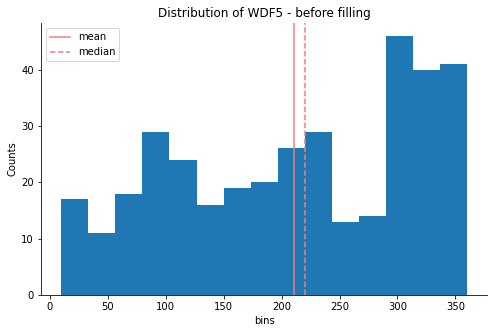

In [44]:
plt.figure(figsize = (8, 5))

plt.hist(atl_2021_weather["WDF5"], bins = 15)

plt.axvline(atl_2021_weather["WDF5"].mean(), color = "lightcoral", label = "mean")
plt.axvline(atl_2021_weather["WDF5"].median(), color = "lightcoral", linestyle = "--", label = "median")

plt.title("Distribution of WDF5 - before filling")
plt.ylabel('Counts')
plt.xlabel("bins")
sns.despine()

plt.legend()
plt.show()

I'm going to fill in the missing values in WDF5 with the median.

In [45]:
wdf_median = atl_2021_weather['WDF5'].median()

atl_2021_weather['WDF5'] = atl_2021_weather['WDF5'].fillna(wdf_median)

In [46]:
atl_2021_weather['WDF5'].isnull().sum()

0

Repeat for WSF5.

In [47]:
atl_2021_weather['WSF5'].describe()

count    363.000000
mean      24.642975
std        7.846661
min       10.100000
25%       19.000000
50%       23.000000
75%       30.000000
max       76.100000
Name: WSF5, dtype: float64

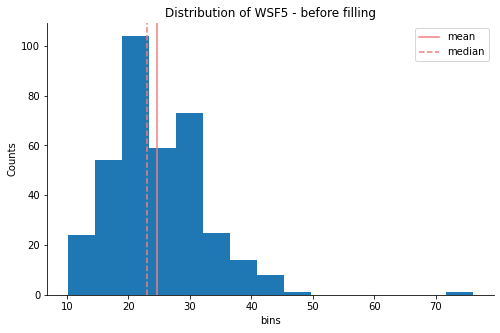

In [48]:
plt.figure(figsize = (8, 5))

plt.hist(atl_2021_weather["WSF5"], bins = 15)

plt.axvline(atl_2021_weather["WSF5"].mean(), color = "lightcoral", label = "mean")
plt.axvline(atl_2021_weather["WSF5"].median(), color = "lightcoral", linestyle = "--", label = "median")

plt.title("Distribution of WSF5 - before filling")
plt.ylabel('Counts')
plt.xlabel("bins")
sns.despine()

plt.legend()
plt.show()

I'm going to fill in the missing values in WSF5 with the median.

In [49]:
wsf_median = atl_2021_weather['WSF5'].median()

atl_2021_weather['WSF5'] = atl_2021_weather['WSF5'].fillna(wsf_median)

Check that there are no more missing values in this column.

In [50]:
atl_2021_weather['WSF5'].isnull().sum()

0

Check the dataframe information. The columns that correspond to different Weather Types 'WT01, WT02' etc., contain missing values. The column PGTM (peak gust time) is 100% empty so I will drop it as well.

After reviewing the NOAA documentation (see NOAA_documentation.pdf) I noticed that there are 22 possible Weather Types, but only 7 are available for Atlanta airport. I cannot infer that missing values would imply any other weather type because the full list of possibilities are not avaiable in this data set. Therefore, I will drop these columns from the dataframe.

In [51]:
atl_2021_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    365 non-null    object 
 1   NAME       365 non-null    object 
 2   LATITUDE   365 non-null    float64
 3   LONGITUDE  365 non-null    float64
 4   ELEVATION  365 non-null    float64
 5   DATE       365 non-null    object 
 6   AWND       365 non-null    float64
 7   PGTM       0 non-null      float64
 8   PRCP       365 non-null    float64
 9   SNOW       365 non-null    float64
 10  SNWD       365 non-null    float64
 11  TAVG       365 non-null    int64  
 12  TMAX       365 non-null    int64  
 13  TMIN       365 non-null    int64  
 14  WDF2       365 non-null    int64  
 15  WDF5       365 non-null    float64
 16  WSF2       365 non-null    float64
 17  WSF5       365 non-null    float64
 18  WT01       135 non-null    float64
 19  WT02       18 non-null     float64
 20  WT03      

I also noticed that the columns 'SNOW' and 'SNWD' appear to have only zero values, which is expected for Atlanta since it does not typically snow there. I can confirm this by checking the value counts for each column.

In [52]:
atl_2021_weather["SNOW"].value_counts()

0.0    365
Name: SNOW, dtype: int64

In [53]:
atl_2021_weather["SNWD"].value_counts()

0.0    365
Name: SNWD, dtype: int64

I can now drop all of these columns from the dataframe, along with 'STATION', 'LATITUDE', 'LONGITUDE' and 'ELEVATION' since these aren't required for modeling or analysis.

In [54]:
atl_2021_weather = atl_2021_weather.drop(columns = ["STATION", "LATITUDE", "LONGITUDE", "ELEVATION", "PGTM", "SNOW", "SNWD", "WT01", "WT02", "WT03", "WT04", "WT05", "WT06", "WT08"])


Check columns have been dropped.

In [55]:
atl_2021_weather.head()

,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2021-01-01,9.40,1.23,60,68,56,130,200.0,16.1,21.9
1,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2021-01-02,5.14,0.00,60,64,54,240,250.0,12.1,17.0
2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2021-01-03,10.96,0.00,49,54,37,300,300.0,21.9,28.0
3,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2021-01-04,6.71,0.00,44,59,34,270,300.0,12.1,15.0
4,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2021-01-05,10.74,0.00,50,58,41,330,330.0,21.0,29.1


My next step is to merge this data set with atl_2021_clean using the column 'DATE' from atl_2021_weather and 'FlightDate' from atl_2021_clean. But before I can do that I need to convert the data type of the column 'DATE' in atl_2021_weather since the columns have to be of the same data type to be merged.

In [56]:
atl_2021_weather["DATE"] = pd.to_datetime(atl_2021_weather["DATE"])

In order to reduce memory usage in this dataframe and the new merged dataframe, I will also change the data types of AWND, PRCP, WSF2, TAVG, TMAX, TMIN and WDF2.

In [57]:
# change these columns to float32
atl_2021_weather[["AWND", "PRCP", "WSF2", "WDF5", "WSF5"]] = atl_2021_weather[["AWND", "PRCP", "WSF2", "WDF5", "WSF5"]].astype('float32')


In [58]:
# change these columns to int32
atl_2021_weather[["TAVG", "TMAX", "TMIN", "WDF2"]] = atl_2021_weather[["TAVG", "TMAX", "TMIN", "WDF2"]].astype('int32')


Check the data types have been changed.

In [59]:
atl_2021_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   NAME    365 non-null    object        
 1   DATE    365 non-null    datetime64[ns]
 2   AWND    365 non-null    float32       
 3   PRCP    365 non-null    float32       
 4   TAVG    365 non-null    int32         
 5   TMAX    365 non-null    int32         
 6   TMIN    365 non-null    int32         
 7   WDF2    365 non-null    int32         
 8   WDF5    365 non-null    float32       
 9   WSF2    365 non-null    float32       
 10  WSF5    365 non-null    float32       
dtypes: datetime64[ns](1), float32(5), int32(4), object(1)
memory usage: 18.7+ KB


Use merge to join the dataframes, and set the column from the left data frame to join on as 'FlightDate' and from the right data frame as 'DATE'.

In [60]:
atl_2021_clean = atl_2021_clean.merge(atl_2021_weather, left_on = "FlightDate", right_on = "DATE")

Check the shape of the new dataframe.

In [61]:
# matches the number of columns in the 2020 data set
atl_2021_clean.shape

(310585, 65)

Check that the data has been merged correctly.

In [62]:
atl_2021_clean.head()

,Year,Quarter,Month,DayofMonth,DayofWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,2021,1,1,1,5,2021-01-01,9E,20363,9E,N272PQ,4636,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1354,1409,15.0,15.0,1.0,1.0,1300-1359,17.0,1426.0,1526.0,3.0,1508,1529,21.0,21.0,1.0,1.0,1500-1559,134.0,140.0,120.0,1,696,3,0.0,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2021-01-01,9.4,1.23,60,68,56,130,200.0,16.1,21.9
1,2021,1,1,1,5,2021-01-01,9E,20363,9E,N335PQ,4638,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11973,1197302,31973,GPT,"Gulfport/Biloxi, MS",MS,28,Mississippi,53,1829,1829,0.0,0.0,0.0,0.0,1800-1859,22.0,1851.0,1855.0,5.0,1855,1900,5.0,5.0,0.0,0.0,1800-1859,86.0,91.0,64.0,1,352,2,0.0,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2021-01-01,9.4,1.23,60,68,56,130,200.0,16.1,21.9
2,2021,1,1,1,5,2021-01-01,9E,20363,9E,N336PQ,4644,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13422,1342202,30562,MOB,"Mobile, AL",AL,1,Alabama,51,1021,1019,-2.0,0.0,0.0,-1.0,1000-1059,9.0,1028.0,1028.0,3.0,1040,1031,-9.0,0.0,0.0,-1.0,1000-1059,79.0,72.0,60.0,1,302,2,0.0,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2021-01-01,9.4,1.23,60,68,56,130,200.0,16.1,21.9
3,2021,1,1,1,5,2021-01-01,9E,20363,9E,N902XJ,4649,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13485,1348502,33485,MSN,"Madison, WI",WI,55,Wisconsin,45,1015,1014,-1.0,0.0,0.0,-1.0,1000-1059,16.0,1030.0,1101.0,3.0,1121,1104,-17.0,0.0,0.0,-2.0,1100-1159,126.0,110.0,91.0,1,707,3,0.0,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2021-01-01,9.4,1.23,60,68,56,130,200.0,16.1,21.9
4,2021,1,1,1,5,2021-01-01,9E,20363,9E,N910XJ,4651,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13795,1379502,33795,OAJ,"Jacksonville/Camp Lejeune, NC",NC,37,North Carolina,36,1040,1100,20.0,20.0,1.0,1.0,1000-1059,20.0,1120.0,1211.0,2.0,1200,1213,13.0,13.0,0.0,0.0,1200-1259,80.0,73.0,51.0,1,399,2,0.0,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2021-01-01,9.4,1.23,60,68,56,130,200.0,16.1,21.9


Drop the columns 'NAME' and 'DATE' since they are redundant now.

In [63]:
atl_2021_clean = atl_2021_clean.drop(columns = ['NAME', 'DATE'])

Final shape of the dataframe with weather variables added.

In [64]:
atl_2021_clean.shape

(310585, 63)

Save a csv version for future use.

In [65]:
atl_2021_clean.to_csv("data/2021/ATL_2021_clean.csv")

Save a pickle version of this cleaned data set with the new data types preserved.

In [66]:
# use 'to_pickle' to save a version of the data
atl_2021_clean.to_pickle("data/atl_2021_clean.pkl")

---

### Next Steps

This cleaned ATL 2021 data set will be merged with the ATL 2020 data set and further EDA will be completed in the next notebook, Notebook 3 (Exploratory Data Analysis).